In [6]:
import pandas as pd
import matplotlib.pyplot as plt

link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code='?raw=true'
url=link+code
df=pd.read_csv(url,sep=',',index_col=1)
df.head()


,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2014-08-29,Guinea,482.0,287.0
2014-08-29,Nigeria,15.0,6.0
2014-08-29,Sierra Leone,935.0,380.0
2014-08-29,Liberia,322.0,225.0
2014-09-05,Guinea,604.0,362.0


In [7]:
df.tail()

,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2016-03-23,Liberia,3151.0,NaN
2016-03-23,Italy,1.0,NaN
2016-03-23,Liberia,2.0,1.0
2016-03-23,Nigeria,19.0,7.0
2016-03-23,United States of America,4.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 2014-08-29 to 2016-03-23
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  2484 non-null   object 
 1   No. of confirmed cases   2484 non-null   float64
 2   No. of confirmed deaths  1648 non-null   float64
dtypes: float64(2), object(1)
memory usage: 142.2+ KB


In [9]:
df

,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2014-08-29,Guinea,482.0,287.0
2014-08-29,Nigeria,15.0,6.0
2014-08-29,Sierra Leone,935.0,380.0
2014-08-29,Liberia,322.0,225.0
2014-09-05,Guinea,604.0,362.0
...,...,...,...
2016-03-23,Liberia,3151.0,NaN
2016-03-23,Italy,1.0,NaN
2016-03-23,Liberia,2.0,1.0


In [12]:
df.isnull().sum()

Country                      0
No. of confirmed cases       0
No. of confirmed deaths    836
dtype: int64

In [13]:
df['Country'].isin(['Mexico']).sum()

0

In [15]:
df[df['Country']=='Sierra Leone']

,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2014-08-29,Sierra Leone,935.0,380.0
2014-09-05,Sierra Leone,1146.0,443.0
2014-09-08,Sierra Leone,1234.0,461.0
2014-09-12,Sierra Leone,1287.0,478.0
2014-09-16,Sierra Leone,1464.0,514.0
...,...,...,...
2015-12-17,Sierra Leone,8704.0,3589.0
2015-12-22,Sierra Leone,8704.0,3589.0
2015-12-23,Sierra Leone,8704.0,3589.0


In [16]:
SL

,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2014-08-29,Sierra Leone,935.0,380.0
2014-09-05,Sierra Leone,1146.0,443.0
2014-09-08,Sierra Leone,1234.0,461.0
2014-09-12,Sierra Leone,1287.0,478.0
2014-09-16,Sierra Leone,1464.0,514.0
...,...,...,...
2015-12-17,Sierra Leone,8704.0,3589.0
2015-12-22,Sierra Leone,8704.0,3589.0
2015-12-23,Sierra Leone,8704.0,3589.0


In [17]:
SL=SL.drop('Country',axis=1)

In [18]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths
Date,,
2014-08-29,935.0,380.0
2014-09-05,1146.0,443.0
2014-09-08,1234.0,461.0
2014-09-12,1287.0,478.0
2014-09-16,1464.0,514.0


In [19]:
SL.isnull().sum()

No. of confirmed cases     0
No. of confirmed deaths    2
dtype: int64

In [20]:
SL.fillna(0.0,inplace=True)

In [21]:
SL.isnull().sum()

No. of confirmed cases     0
No. of confirmed deaths    0
dtype: int64

In [22]:
SL['No. of confirmed deaths'].mean()

3081.019305019305

In [23]:
SL['No. of confirmed cases'].mean()

7883.671814671815

In [28]:
Dates=SL.index[0:-1:10]
NCC=SL['No. of confirmed cases'][0:-1:10]
NCD=SL['No. of confirmed deaths'][0:-1:10]

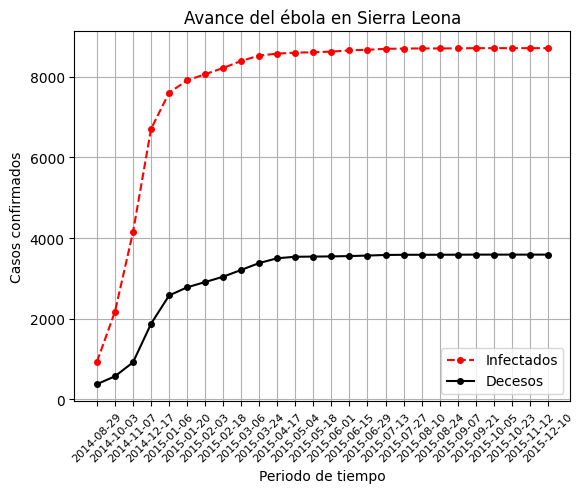

In [32]:
plt.plot(Dates,NCC,'o--r',ms=4,label='Infectados')
plt.plot(Dates,NCD,'o-k',ms=4,label='Decesos')
plt.grid()
plt.title('Avance del ébola en Sierra Leona')
plt.ylabel('Casos confirmados')
plt.xlabel('Periodo de tiempo')
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.show()

In [35]:
PIvsD=100*SL['No. of confirmed deaths']/SL['No. of confirmed cases']
SL['PIvsD']=PIvsD

In [36]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths,PIvsD
Date,,,
2014-08-29,935.0,380.0,40.641711
2014-09-05,1146.0,443.0,38.656195
2014-09-08,1234.0,461.0,37.358185
2014-09-12,1287.0,478.0,37.140637
2014-09-16,1464.0,514.0,35.109290


In [38]:
recuperados=((100-PIvsD)/100)*SL['No. of confirmed cases']
SL['recuperados']=recuperados

In [39]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths,PIvsD,recuperados
Date,,,,
2014-08-29,935.0,380.0,40.641711,555.0
2014-09-05,1146.0,443.0,38.656195,703.0
2014-09-08,1234.0,461.0,37.358185,773.0
2014-09-12,1287.0,478.0,37.140637,809.0
2014-09-16,1464.0,514.0,35.109290,950.0
